# Imports


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Funciones Auxiliares


In [3]:
def time_to_seconds(t):
    """
    Converts a time in the format mm:ss.xx to total seconds.

        Args:
            t (str): Time in format mm:ss.xx or just seconds

        Returns:
            float: Total time in seconds, or None if input is NaN
    """
    if pd.isna(t):
        return None
    parts = t.split(':')
    if len(parts) == 2:
        minutes = int(parts[0])
        seconds = float(parts[1])
        return minutes * 60 + seconds
    else:
        return float(t)

# Escalabilidad Mononodo


## Nativo: Subpopulations Fijo vs Subpopulations Variable


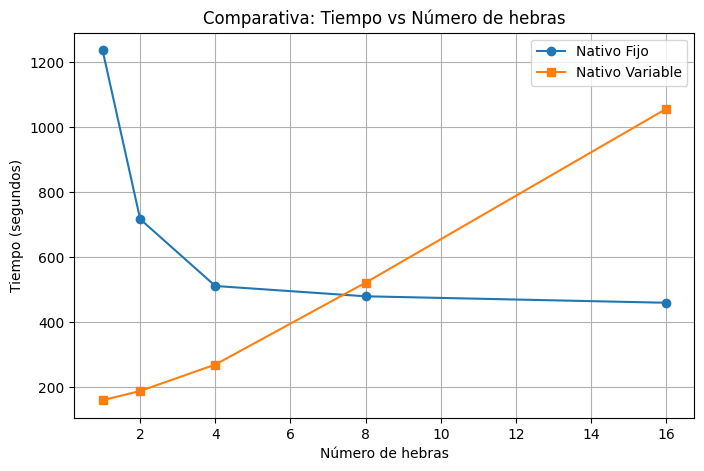

In [4]:
# Load CSVs
df_single_node_native_fixed = pd.read_csv('../results/scalability_single-node_native_subpop-fixed.csv')
df_single_node_native_variable = pd.read_csv('../results/scalability_single-node_native_subpop-variable.csv')

# Convert time columns to seconds
df_single_node_native_fixed['time_seconds'] = df_single_node_native_fixed['time'].apply(time_to_seconds)
df_single_node_native_variable['time_seconds'] = df_single_node_native_variable['time'].apply(time_to_seconds)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(df_single_node_native_fixed['threads'], df_single_node_native_fixed['time_seconds'], marker='o', label='Nativo Fijo')
plt.plot(df_single_node_native_variable['threads'], df_single_node_native_variable['time_seconds'], marker='s', label='Nativo Variable')
plt.xlabel('Número de hebras')
plt.ylabel('Tiempo (segundos)')
plt.title('Comparativa: Tiempo vs Número de hebras')
plt.legend()
plt.grid(True)
plt.show()

## Nativo: Tiempo de ejecución vs Número de hebras


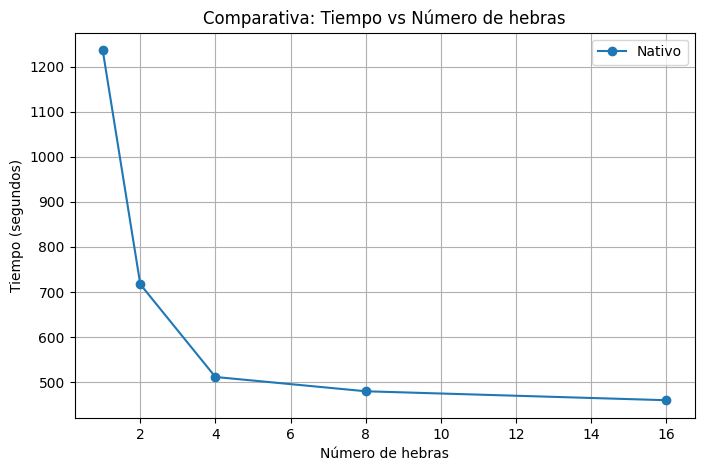

In [5]:
# Load CSVs
df_single_node_native = pd.read_csv('../results/scalability_single-node_native.csv')

# Convert time columns to seconds
df_single_node_native['time_seconds'] = df_single_node_native['time'].apply(time_to_seconds)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(df_single_node_native['threads'], df_single_node_native['time_seconds'], marker='o', label='Nativo')
plt.xlabel('Número de hebras')
plt.ylabel('Tiempo (segundos)')
plt.title('Comparativa: Tiempo vs Número de hebras')
plt.legend()
plt.grid(True)
plt.show()

## Nativo: Porcentaje de uso de CPU vs Número de hebras


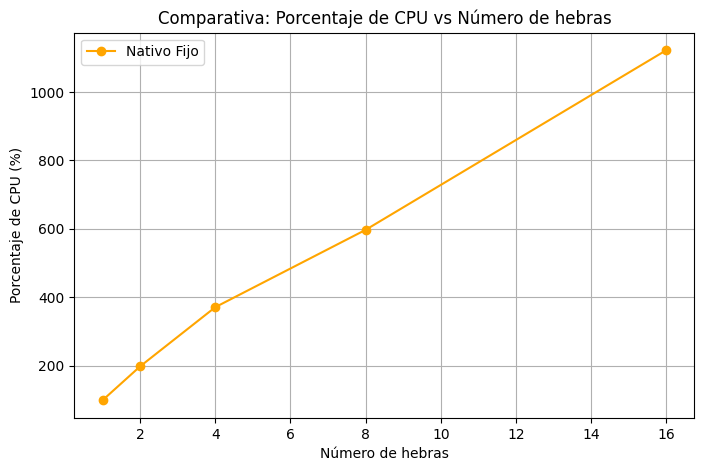

In [ ]:
# Graficar número de hebras vs porcentaje de CPU
plt.figure(figsize=(8, 5))
plt.plot(df_single_node_native_fixed['threads'], df_single_node_native_fixed['cpu_percentage'], marker='o', color='orange', label='Nativo')
plt.xlabel('Número de hebras')
plt.ylabel('Porcentaje de CPU (%)')
plt.title('Comparativa: Porcentaje de CPU vs Número de hebras')
plt.grid(True)
plt.legend()
plt.show()

## Nativo vs Docker


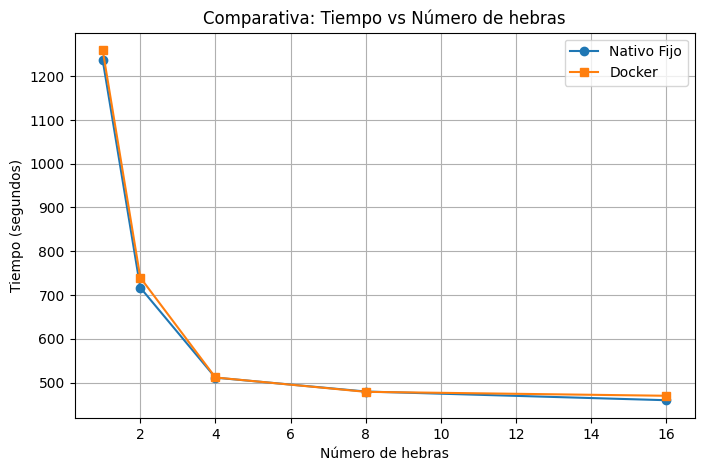

In [ ]:
# Load CSVs
df_single_node_native = pd.read_csv('../results/scalability_single-node_native.csv')
df_single_node_docker = pd.read_csv('../results/scalability_single-node_docker.csv')

# Convert time columns to seconds
df_single_node_native['time_seconds'] = df_single_node_native['time'].apply(time_to_seconds)
df_single_node_docker['time_seconds'] = df_single_node_docker['time'].apply(time_to_seconds)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(df_single_node_native['threads'], df_single_node_native['time_seconds'], marker='o', label='Nativo')
plt.plot(df_single_node_docker['threads'], df_single_node_docker['time_seconds'], marker='s', label='Docker')
plt.xlabel('Número de hebras')
plt.ylabel('Tiempo (segundos)')
plt.title('Comparativa: Tiempo vs Número de hebras')
plt.legend()
plt.grid(True)
plt.show()

# Escalabilidad Multinodo


## Nativo: Tiempo de Ejecución vs Número de Nodos


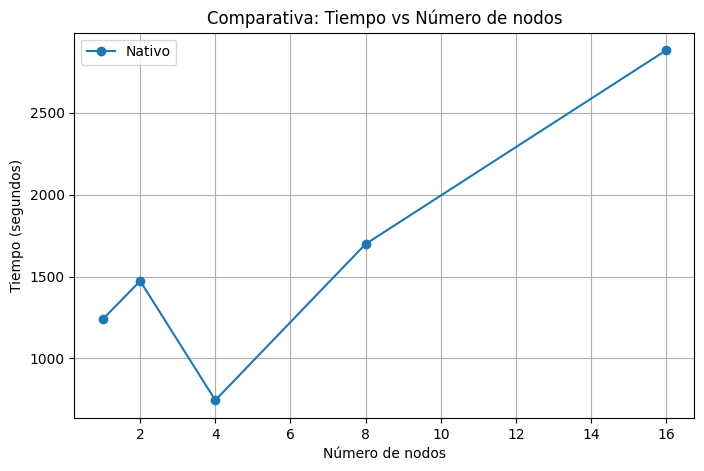

In [8]:
# Load CSVs
df_multi_node_native = pd.read_csv('../results/scalability_multi-node_native.csv')

# Convert time columns to seconds
df_multi_node_native['time_seconds'] = df_multi_node_native['time'].apply(time_to_seconds)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(df_multi_node_native['nodes'], df_multi_node_native['time_seconds'], marker='o', label='Nativo')
plt.xlabel('Número de nodos')
plt.ylabel('Tiempo (segundos)')
plt.title('Comparativa: Tiempo vs Número de nodos')
plt.legend()
plt.grid(True)
plt.show()

## Nativo: Porcentaje de uso de CPU vs Número de nodos


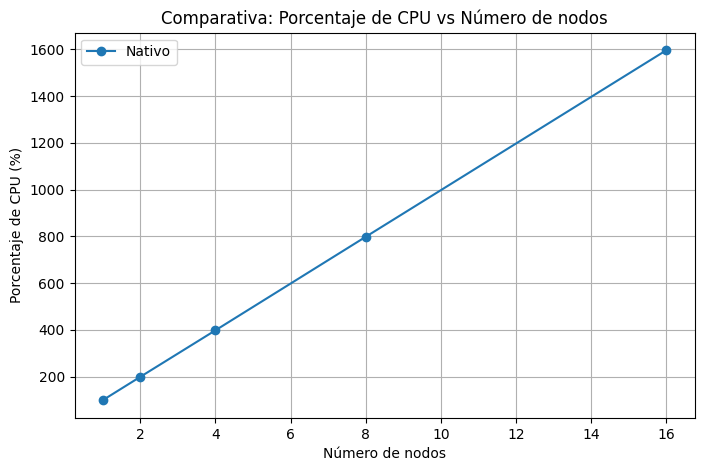

In [11]:
# Plotting
plt.figure(figsize=(8, 5))
plt.plot(df_multi_node_native['nodes'], df_multi_node_native['cpu_percentage'], marker='o', label='Nativo')
plt.xlabel('Número de nodos')
plt.ylabel('Porcentaje de CPU (%)')
plt.title('Comparativa: Porcentaje de CPU vs Número de nodos')
plt.legend()
plt.grid(True)
plt.show()

## Nativo vs Docker


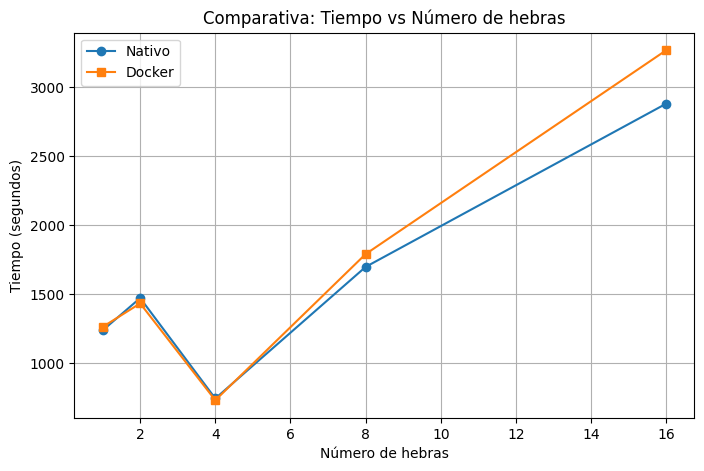

In [14]:
# Load CSVs
df_multi_node_docker = pd.read_csv('../results/scalability_multi-node_docker.csv')

# Convert time columns to seconds
df_multi_node_docker['time_seconds'] = df_multi_node_docker['time'].apply(time_to_seconds)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(df_multi_node_native['nodes'], df_multi_node_native['time_seconds'], marker='o', label='Nativo')
plt.plot(df_multi_node_docker['nodes'], df_multi_node_docker['time_seconds'], marker='s', label='Docker')
plt.xlabel('Número de hebras')
plt.ylabel('Tiempo (segundos)')
plt.title('Comparativa: Tiempo vs Número de hebras')
plt.legend()
plt.grid(True)
plt.show()

# Escalabilidad Mononodo vs Multinodo


## Local


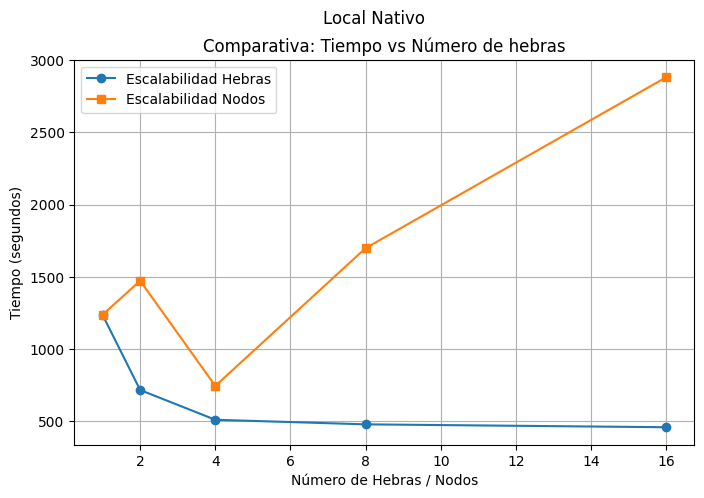

In [17]:
# Plotting
plt.figure(figsize=(8, 5))
plt.plot(df_single_node_native['threads'], df_single_node_native['time_seconds'], marker='o', label='Escalabilidad Hebras')
plt.plot(df_multi_node_native['nodes'], df_multi_node_native['time_seconds'], marker='s', label='Escalabilidad Nodos')
plt.xlabel('Número de Hebras / Nodos')
plt.ylabel('Tiempo (segundos)')
plt.title('Comparativa: Tiempo vs Número de hebras')
plt.suptitle('Local Nativo')
plt.legend()
plt.grid(True)
plt.show()